0  Intro

🌡️ Extreme Temperatures 
Paris → 75
Lyon → 69
Bordeaux → 33
Marseille → 13

We deliberately use daily data rather than hourly data because daily extremes are the standard basis 
for climate and public-health heat indicators, while hourly data would substantially increase 
complexity without improving robustness or interpretability for this project. Daily temperature profiles 
could be used once heatwaves are IDed.  


1  Import libraries

In [10]:
#math libraries
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#other
import os



2 Functions

In [11]:
# define path for raw data
def load_city_data(path):
    """
    Load a Meteo-France CSV file and parse the date column.
    """
    df = pd.read_csv(path, sep=";")
    df.columns = df.columns.astype(str).str.strip()
    df["date"] = pd.to_datetime(df["AAAAMMJJ"], format="%Y%m%d", errors="coerce")
    df = df.dropna(subset=["date"])
    return df


# Select the top 5 meteo stations per city
def select_top_stations(df, min_tx_days=8000, min_end_year=2015, n_stations=5):
    """
    Select the best weather stations based on:
    - number of available TX (daily max temperature) values
    - recent data availability
    """
    summary = (
        df.groupby(["NUM_POSTE", "NOM_USUEL"])
          .agg(
              n_TX=("TX", "count"),
              start_date=("date", "min"),
              end_date=("date", "max")
          )
          .reset_index()
    )

    selected = (
        summary[
            (summary["n_TX"] >= min_tx_days) &
            (summary["end_date"].dt.year >= min_end_year)
        ]
        .sort_values("n_TX", ascending=False)
        .head(n_stations)
    )

    return selected


# Filter results by city/stations
def filter_city_by_stations(df, stations_df):
    """
    Keep only observations from the selected stations.
    """
    station_ids = stations_df["NUM_POSTE"].tolist()
    return df[df["NUM_POSTE"].isin(station_ids)].copy()


3 Load the data

| Variable | Description |
|--------|------------|
| NUM_POSTE | Station ID |
| NOM_USUEL | Station name |
| LAT | Latitude |
| LON | Longitude |
| ALTI | Altitude (m) |
| AAAAMMJJ | Date (YYYYMMDD) |
| date | Parsed date |
| RR | Daily precipitation (mm) |
| QRR | Quality flag (RR) |
| TN | Daily minimum temperature (°C) |
| QTN | Quality flag (TN) |
| HTN | Time of TN |
| TX | Daily maximum temperature (°C) |
| QTX | Quality flag (TX) |
| HTX | Time of TX |
| TM | Mean daily temperature (°C) |
| QTM | Quality flag (TM) |
| TNTXM | (TN + TX) / 2 |
| TAMPLI | Daily thermal amplitude (TX − TN) |
| TNSOL | Min ground temperature (10 cm) |
| TN50 | Min temperature at 50 cm |
| DG | Frost duration (minutes) |
| FFM | Mean daily wind speed (10 m) |
| FF2M | Mean wind speed (2 m) |
| FXY | Max hourly wind (10 m) |
| DXY | Direction of max wind |
| HXY | Time of max wind |
| FXI | Max instantaneous wind (10 m) |
| DXI | Direction of FXI |
| HXI | Time of FXI |
| FXI2 | Max instantaneous wind (2 m) |
| FXI3S | Max 3-second wind gust |
| DRR | Duration of precipitation (min) |
| Q* | Quality flag for variable `*` |


In [12]:
# =========================
# Base path to data folder
# =========================
DATA_DIR = "/Users/leahgoldfarb/Downloads/France meteo DS"

# =========================
# File paths
# =========================
PATH_75 = f"{DATA_DIR}/Paris_Q_75_previous-1950-2023_RR-T-Vent.csv"
PATH_13 = f"{DATA_DIR}/Marseille_Q_13_previous-1950-2023_RR-T-Vent.csv"
PATH_33 = f"{DATA_DIR}/Bordeaux_Q_33_previous-1950-2023_RR-T-Vent.csv"
PATH_69 = f"{DATA_DIR}/Lyon_Q_69_previous-1950-2023_RR-T-Vent.csv"

# =========================
# Load data
# =========================
df_75 = load_city_data(PATH_75)
df_13 = load_city_data(PATH_13)
df_33 = load_city_data(PATH_33)
df_69 = load_city_data(PATH_69)


# =========================
# Preview data
# =========================
print('Paris')
display(df_75.head())
display(df_75.columns)
print('Marseille')
display(df_13.head())
display(df_13.columns)
print('Bordeaux')
display(df_33.head())
display(df_33.columns)
print('Lyon')
display(df_69.head())
display(df_69.columns)

Paris


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,75101001,INNOCENTS,48.860667,2.348333,37,19500101,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-01
1,75101001,INNOCENTS,48.860667,2.348333,37,19500102,1.8,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-02
2,75101001,INNOCENTS,48.860667,2.348333,37,19500103,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-03
3,75101001,INNOCENTS,48.860667,2.348333,37,19500104,0.2,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-04
4,75101001,INNOCENTS,48.860667,2.348333,37,19500105,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-05


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
       'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

Marseille


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620701,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-01
1,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620702,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-02
2,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620703,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-03
3,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620704,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-04
4,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620705,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-05


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
       'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

Bordeaux


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,33004001,AMBES,45.041667,-0.608333,5,19571215,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-15
1,33004001,AMBES,45.041667,-0.608333,5,19571216,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-16
2,33004001,AMBES,45.041667,-0.608333,5,19571217,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-17
3,33004001,AMBES,45.041667,-0.608333,5,19571218,21.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-18
4,33004001,AMBES,45.041667,-0.608333,5,19571219,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-19


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
       'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

Lyon


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,19630301,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-01
1,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,19630302,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-02
2,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,19630303,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-03
3,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,19630304,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-04
4,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,19630305,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-05


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
       'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

4 Select the 5 stations to keep per city  (same logic for selection) 

In [13]:
# 4. Select top 5 stations per city (single source of truth)
stations_75 = select_top_stations(df_75)  # Paris
stations_13 = select_top_stations(df_13)  # Marseille
stations_33 = select_top_stations(df_33)  # Bordeaux
stations_69 = select_top_stations(df_69)  # Lyon

5  Apply station selection 

In [14]:
df_75_top = filter_city_by_stations(df_75, stations_75)  # Paris
df_13_top = filter_city_by_stations(df_13, stations_13)  # Marseille
df_33_top = filter_city_by_stations(df_33, stations_33)  # Bordeaux
df_69_top = filter_city_by_stations(df_69, stations_69)  # Lyon

6 Select variables and rename (work only from *_top dataframes)

In [15]:


# Variables retained and renamed for clarity
rename_map = {
    'TM': 'temp_mean_c',
    'TX': 'temp_max_c',

    'FFM': 'wind_mean_10m_ms',
    'FF2M': 'wind_mean_2m_ms',
    'FXY': 'wind_max_hourly_ms',
    'FXI': 'wind_max_inst_ms',
    'FXI3S': 'wind_gust_3s_ms',

    'DXY': 'wind_dir_max_deg',
    'DXI': 'wind_dir_inst_deg'
}

cols_to_keep = ['date'] + list(rename_map.keys())

# Apply variable selection and renaming
df_75_climate = df_75_top[cols_to_keep].rename(columns=rename_map).copy()  # Paris
df_13_climate = df_13_top[cols_to_keep].rename(columns=rename_map).copy()  # Marseille
df_33_climate = df_33_top[cols_to_keep].rename(columns=rename_map).copy()  # Bordeaux
df_69_climate = df_69_top[cols_to_keep].rename(columns=rename_map).copy()  # Lyon

7 save the dates

In [16]:

# Add city labels
df_75_climate["city"] = "Paris"
df_13_climate["city"] = "Marseille"
df_33_climate["city"] = "Bordeaux"
df_69_climate["city"] = "Lyon"

# Merge all cities into one dataframe
df_climate_all = pd.concat(
    [df_75_climate, df_13_climate, df_33_climate, df_69_climate],
    ignore_index=True
)

# Basic sanity check
df_climate_all = df_climate_all.sort_values(["city", "date"]).reset_index(drop=True)

# Save final preprocessed dataset with wind

# Create output folder for per-city files
CITY_OUT_DIR = "temp_wind_city_outputs"
os.makedirs(CITY_OUT_DIR, exist_ok=True)

# Save one file per city
df_75_climate.to_csv(f"{CITY_OUT_DIR}/Paris_temp_wind_top_stations.csv", index=False)
df_13_climate.to_csv(f"{CITY_OUT_DIR}/Marseille_temp_wind_top_stations.csv", index=False)
df_33_climate.to_csv(f"{CITY_OUT_DIR}/Bordeaux_temp_wind_top_stations.csv", index=False)
df_69_climate.to_csv(f"{CITY_OUT_DIR}/Lyon_temp_wind_top_stations.csv", index=False)


8.1 Analyzsis of wind data

In [17]:
# ===============================
# Wind variable availability per city
# ===============================

wind_vars = [
    "wind_mean_10m_ms",
    "wind_mean_2m_ms",
    "wind_max_hourly_ms",
    "wind_max_inst_ms",
    "wind_gust_3s_ms",
    "wind_dir_max_deg",
    "wind_dir_inst_deg"
]

city_dfs = {
    "Paris": df_75_climate,
    "Marseille": df_13_climate,
    "Bordeaux": df_33_climate,
    "Lyon": df_69_climate
}

rows = []

for city, df in city_dfs.items():
    for var in wind_vars:
        rows.append({
            "city": city,
            "variable": var,
            "n_non_null": df[var].notna().sum(),
            "coverage_%": round(df[var].notna().mean() * 100, 1)
        })

wind_availability = pd.DataFrame(rows)

# ML-ready variables (example threshold)
ml_ready_wind = wind_availability[wind_availability["coverage_%"] >= 80]

# Optional: wide view for quick inspection
wind_availability_wide = wind_availability.pivot(
    index="variable",
    columns="city",
    values="coverage_%"
)

wind_availability, ml_ready_wind, wind_availability_wide

(         city            variable  n_non_null  coverage_%
 0       Paris    wind_mean_10m_ms       32271        31.3
 1       Paris     wind_mean_2m_ms           0         0.0
 2       Paris  wind_max_hourly_ms       22693        22.0
 3       Paris    wind_max_inst_ms       34907        33.8
 4       Paris     wind_gust_3s_ms       23597        22.9
 5       Paris    wind_dir_max_deg       22488        21.8
 6       Paris   wind_dir_inst_deg       30302        29.4
 7   Marseille    wind_mean_10m_ms      111373        83.7
 8   Marseille     wind_mean_2m_ms           0         0.0
 9   Marseille  wind_max_hourly_ms       78656        59.1
 10  Marseille    wind_max_inst_ms      116510        87.5
 11  Marseille     wind_gust_3s_ms       70959        53.3
 12  Marseille    wind_dir_max_deg       78608        59.0
 13  Marseille   wind_dir_inst_deg      107559        80.8
 14   Bordeaux    wind_mean_10m_ms       80298        59.4
 15   Bordeaux     wind_mean_2m_ms        9551         7

8.2 Intrepretation of wind data: which  feature has the best coverage?

-------------------
wind_max_inst_ms
--------------------

From above, Marseille has the best coverage

In [19]:
# ===============================
# Select ONE wind variable for all cities
# ===============================

# minimum coverage across cities per variable
score_table = (
    wind_availability
    .groupby("variable")["coverage_%"]
    .min()
    .reset_index()
    .rename(columns={"coverage_%": "min_coverage_%"})
    .sort_values("min_coverage_%", ascending=False)
)

score_table

,variable,min_coverage_%
4,wind_max_inst_ms,20.0
5,wind_mean_10m_ms,20.0
0,wind_dir_inst_deg,16.8
1,wind_dir_max_deg,13.8
3,wind_max_hourly_ms,13.8
2,wind_gust_3s_ms,11.6
6,wind_mean_2m_ms,0.0


9 Examine the stations selected

In [8]:
print("Paris stations:")
print(stations_75[["NUM_POSTE", "NOM_USUEL", "n_TX"]])
print('\n')
print("Lyon stations:")
print(stations_69[["NUM_POSTE", "NOM_USUEL", "n_TX"]])
print('\n')
print("Bordeaux stations:")
print(stations_33[["NUM_POSTE", "NOM_USUEL", "n_TX"]])
print('\n')
print("Marseille stations:")
print(stations_13[["NUM_POSTE", "NOM_USUEL", "n_TX"]])


Paris stations:
    NUM_POSTE         NOM_USUEL   n_TX
16   75114001  PARIS-MONTSOURIS  27028
3    75106001        LUXEMBOURG  16648
23   75116002         BAGATELLE   9608
15   75113002       SALPETRIERE   9556
6    75107005       TOUR EIFFEL   9220


Lyon stations:
    NUM_POSTE       NOM_USUEL   n_TX
10   69029001       LYON-BRON  27028
75   69204002  ST-GENIS-LAVAL  26962
56   69141001         MORNANT  26655
53   69135001         MONSOLS  26508
99   69264001    VILLEFRANCHE  24461


Bordeaux stations:
     NUM_POSTE                NOM_USUEL   n_TX
75    33236002               CAP-FERRET  27028
143   33529001                   CAZAUX  27028
81    33281001        BORDEAUX-MERIGNAC  27028
131   33504001                SAUTERNES  27027
153   33550001  VILLENAVE D'ORNON-INRAE  26997


Marseille stations:
     NUM_POSTE          NOM_USUEL   n_TX
44    13047001             ISTRES  27028
51    13054001          MARIGNANE  27028
108   13103001  SALON DE PROVENCE  27028
2     13001009    AIX 

10  👀 Visualize Tx (Max temp: weather) and averaged tempartures (climate change)

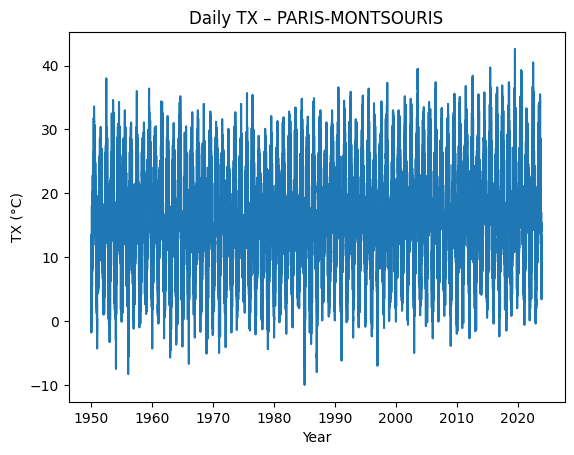

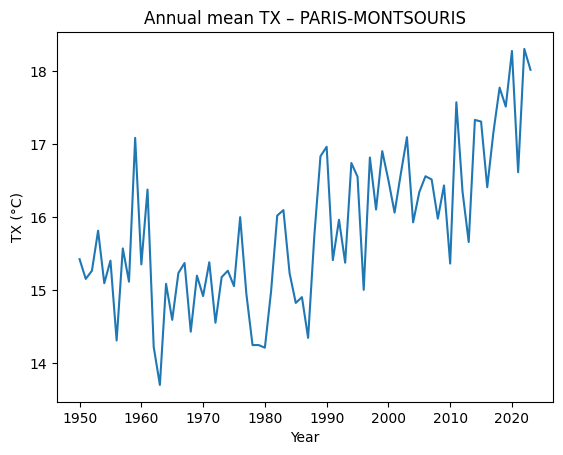

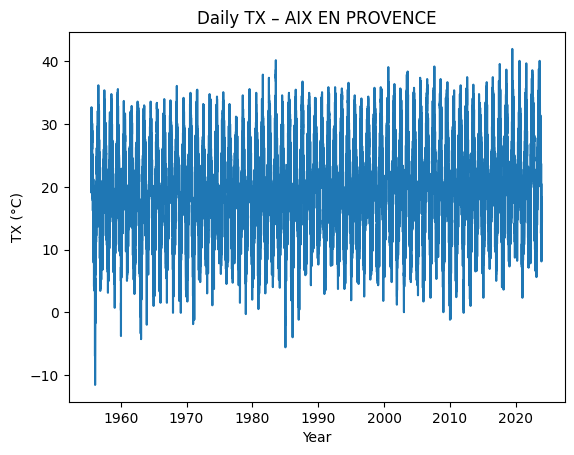

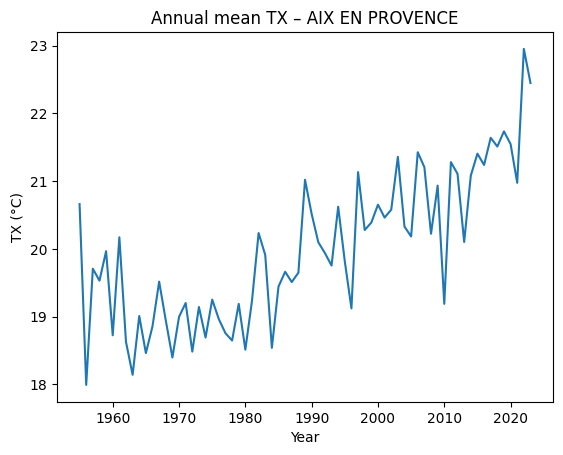

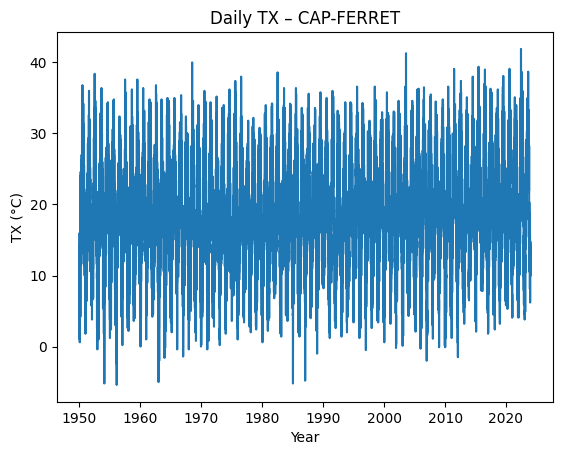

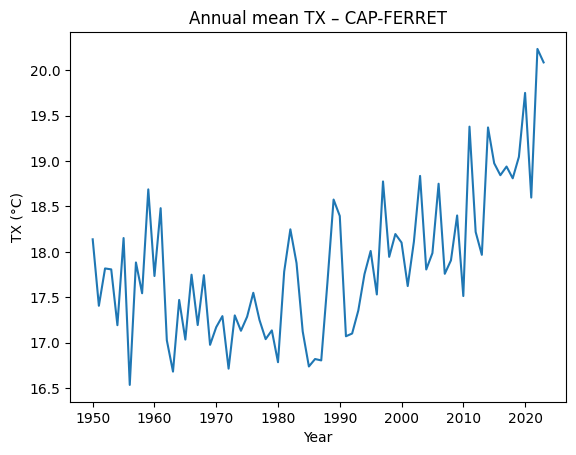

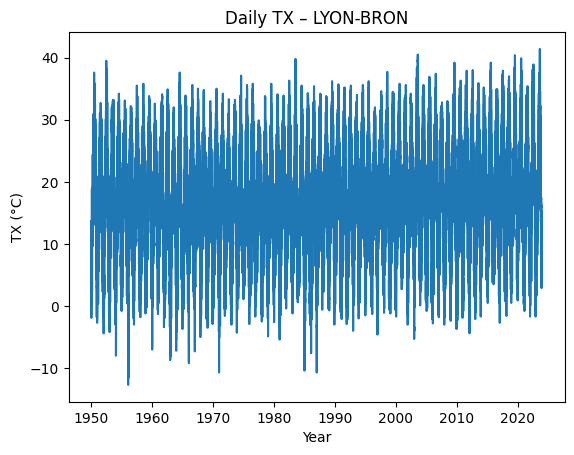

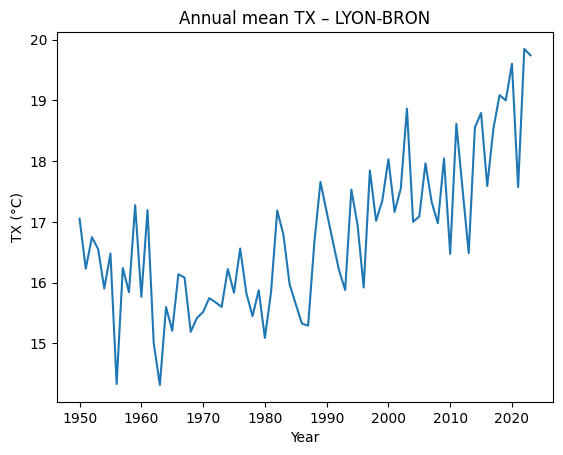

In [9]:


# =========================
# Functions 
# =========================

def prepare_df(df):
    df = df.copy()
    df["date"] = pd.to_datetime(df["AAAAMMJJ"], format="%Y%m%d")
    return df

def station_quality(df):
    return (
        df.groupby("NOM_USUEL")["TX"]
        .apply(lambda x: x.isna().mean())
        .sort_values()
    )

def plot_daily_tx(df, station):
    d = df[df["NOM_USUEL"] == station]
    plt.figure()
    plt.plot(d["date"], d["TX"])
    plt.title(f"Daily TX – {station}")
    plt.xlabel("Year")
    plt.ylabel("TX (°C)")
    plt.show()

# This operation groups daily TX values by calendar year and 
# computes the arithmetic mean for each year, without applying any running or rolling average.
def plot_annual_tx(df, station):
    d = df[df["NOM_USUEL"] == station].dropna(subset=["TX"])
    d["year"] = d["date"].dt.year
    annual = d.groupby("year")["TX"].mean()

    plt.figure()
    plt.plot(annual.index, annual.values)
    plt.title(f"Annual mean TX – {station}")
    plt.xlabel("Year")
    plt.ylabel("TX (°C)")
    plt.show()

def export_city(df, city_name):
    cols = ["date", "NUM_POSTE", "NOM_USUEL", "TX", "TN", "LAT", "LON", "ALTI"]
    df[cols].to_csv(f"{city_name}_daily_TX_raw.csv", index=False)

# =========================
# Apply to all cities
# =========================

cities = {
    "Paris": df_75,
    "Marseille": df_13,
    "Bordeaux": df_33,
    "Lyon": df_69
}

for city, df in cities.items():
    df = prepare_df(df)

    tx_missing = station_quality(df)
    best_station = tx_missing.index[0]

    plot_daily_tx(df, best_station)
    plot_annual_tx(df, best_station)

    export_city(df, city)